In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from pbsom.SOCEM import SOCEM
from pbsom.Monitor import Monitor
from pbsom.Utils import RectangularLattice

### Example 1

In [2]:
# Define the parameters for the Gaussian mixture
means = np.array([2, 5, 6, 8])
variances = np.array([1.2, 0.4, 0.9, 0.2])
n_samples = 120

# Generate data points from the Gaussian mixture
data = np.concatenate([np.random.normal(means[i], variances[i], n_samples) for i in range(len(means))])

# Visualize the generated data
hist_data, bin_edges, _ = plt.hist(data, bins=30, density=True, alpha=0.7, color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('1D Gaussian Mixture Dataset')

Text(0.5, 1.0, '1D Gaussian Mixture Dataset')

In [3]:
data

array([ 2.32025033,  0.41757845,  3.66101829,  2.57615899,  1.90189951,
        1.51325102,  1.30994212,  4.24996944,  1.95773426,  1.24850726,
        2.72804419,  3.87746258,  1.16840505,  2.96299061,  2.69888069,
        1.61431634,  1.70153408,  0.55185296,  2.40060708, -0.64038897,
        3.63301159,  1.51523935,  3.45575951,  1.55064346,  2.65456349,
        1.77405923,  0.83222497,  1.59131947,  1.59805099,  0.77257213,
        2.93310327, -0.58776076,  2.33125036,  1.39443466,  3.30243535,
        1.78233295,  1.76870236,  2.03478999,  1.97477747,  2.88240188,
        2.7959234 ,  3.90545242,  0.99505985,  0.69491232,  3.94155638,
        1.31829729,  2.3899502 ,  2.0776305 ,  3.29204484, -0.41444663,
        1.98652092,  3.86508451,  3.924457  ,  2.54607633,  1.68926937,
        2.4368408 ,  3.20476415,  2.95488427,  2.55874002,  2.99949115,
        2.10493091,  1.0569924 , -1.12435692, -0.3547205 ,  2.57908966,
        0.51227425,  2.01038993,  0.52673157,  2.0267042 ,  2.42

In [4]:
X = data.reshape(-1, 1)
X

array([[ 2.32025033],
       [ 0.41757845],
       [ 3.66101829],
       [ 2.57615899],
       [ 1.90189951],
       [ 1.51325102],
       [ 1.30994212],
       [ 4.24996944],
       [ 1.95773426],
       [ 1.24850726],
       [ 2.72804419],
       [ 3.87746258],
       [ 1.16840505],
       [ 2.96299061],
       [ 2.69888069],
       [ 1.61431634],
       [ 1.70153408],
       [ 0.55185296],
       [ 2.40060708],
       [-0.64038897],
       [ 3.63301159],
       [ 1.51523935],
       [ 3.45575951],
       [ 1.55064346],
       [ 2.65456349],
       [ 1.77405923],
       [ 0.83222497],
       [ 1.59131947],
       [ 1.59805099],
       [ 0.77257213],
       [ 2.93310327],
       [-0.58776076],
       [ 2.33125036],
       [ 1.39443466],
       [ 3.30243535],
       [ 1.78233295],
       [ 1.76870236],
       [ 2.03478999],
       [ 1.97477747],
       [ 2.88240188],
       [ 2.7959234 ],
       [ 3.90545242],
       [ 0.99505985],
       [ 0.69491232],
       [ 3.94155638],
       [ 1

In [5]:
epochs=50
lattice = RectangularLattice((2, 2))
som = SOCEM(lattice, 1.002, random_state=49)
monitor = Monitor(epochs, som)

In [6]:
som.fit(X, monitor)

In [7]:
monitor.weights_[monitor.idx_-1]

array([0.28125   , 0.26041667, 0.27083333, 0.1875    ])

In [8]:
monitor.means_[monitor.idx_-1]

array([[4.96701673, 4.96701673],
       [7.98700728, 7.98700728],
       [2.17778975, 2.17778975],
       [6.25229649, 6.25229649]])

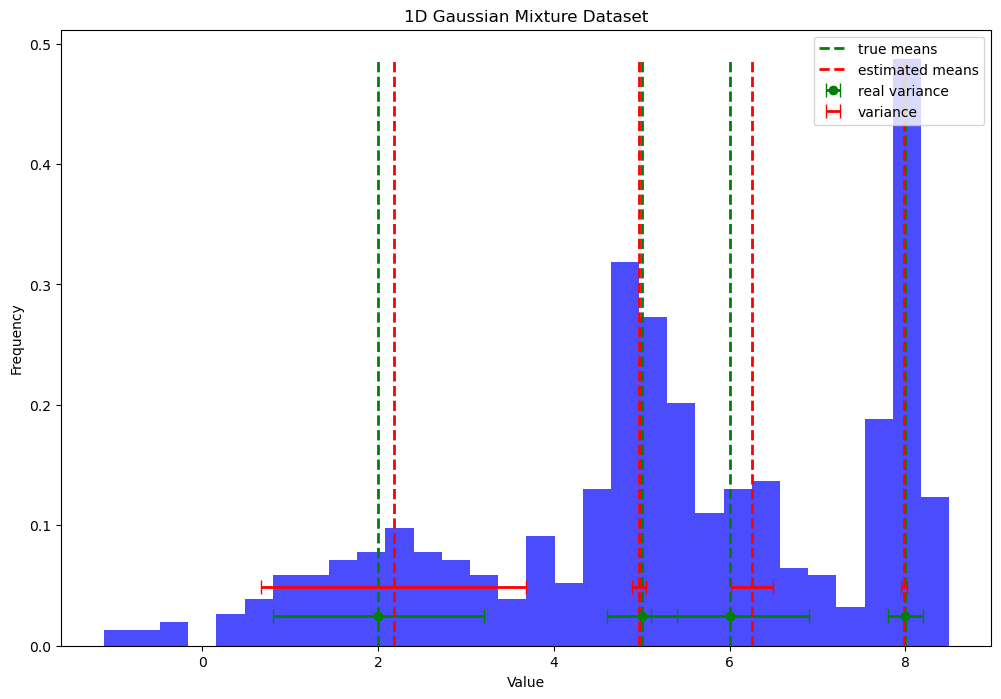

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

# Visualize the generated data
ax.hist(data, bins=30, density=True, alpha=0.7, color='b')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('1D Gaussian Mixture Dataset')

neuron_variances = np.array([neuron.cov_[0] for neuron in som.lattice_.neurons_]).flatten()
neuron_weights = np.array([neuron.mean_ for neuron in som.lattice_.neurons_]).flatten()

# Plot vertical lines for real means:
ax.vlines(x=means, color='g', linestyle='--', linewidth=2, label='true means', ymin=0, ymax=max(hist_data))
ax.errorbar(means, np.full(len(means), max(hist_data) * 0.05), xerr=variances, fmt='go', elinewidth=2, capsize=5, label='real variance')

# Plot vertical lines for neuron weights
ax.vlines(x=neuron_weights, color='r', linestyle='--', linewidth=2, label='estimated means', ymin=0, ymax=max(hist_data))
ax.errorbar(x=neuron_weights, y=np.full(len(neuron_weights), max(hist_data) * 0.1), xerr=neuron_variances, color='r', fmt='none', elinewidth=2, capsize=5, label='variance')


ax.legend(loc='upper right');

### Example 4

In [10]:
def generate_mixture(means, covarinces, probabilities, n_samples):
    mixture_indexes = np.random.choice(a=probabilities.size, p=probabilities, size=n_samples)
    
    labels = []
    data = []
    for idx in (mixture_indexes):
        mean = means[idx]
        cov = covarinces[idx]

        data.append(np.random.multivariate_normal(mean, cov))
        labels.append(idx)

    return np.array(data), np.array(labels)

In [11]:
n_samples = 500

# Define the parameters for the 2D Gaussian finite mixture
means = np.array([[0, -2], [2, -5], [6.2, 8.2], [6.7, 4.7]])

# Define covariances for each component
covariances = np.array([[[2, 0], [0, 1]],  
                        [[1, 0.5], [0.5, 1]],  
                        [[1.5, 0.3], [0.3, 2]],
                        [[3, -0.9], [-0.9, 2.5]]])

probabilities = np.array([0.2, 0.3, 0.1, 0.4])

In [12]:
data, labels = generate_mixture(means, covariances, probabilities, n_samples)

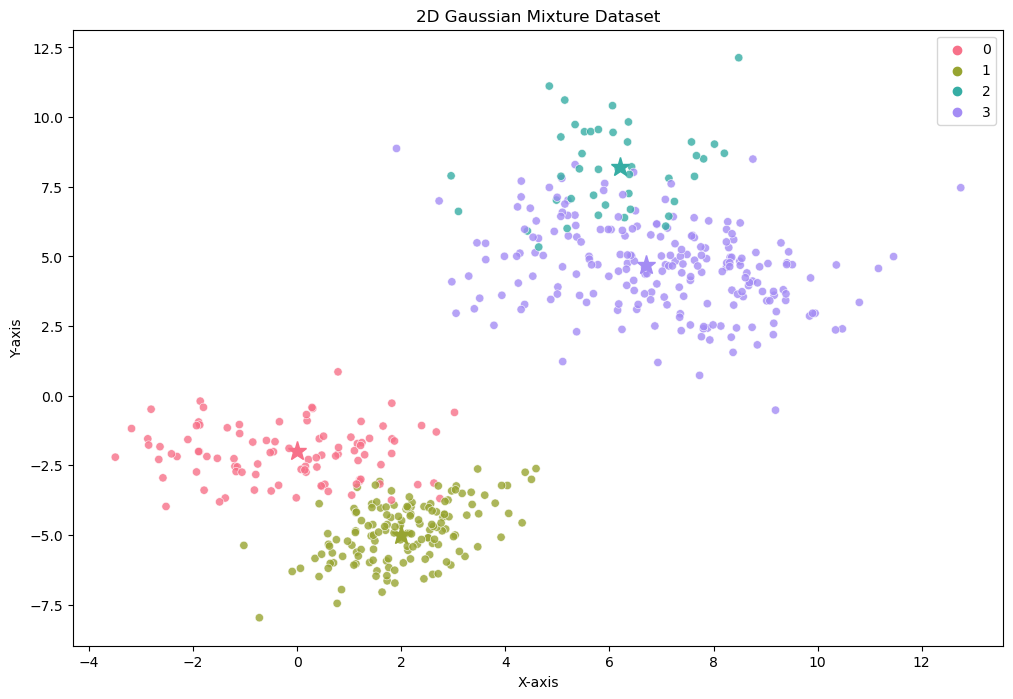

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

# Generate data points from the 2D Gaussian mixture

custom_palette = sns.color_palette("husl", len(np.unique(labels)))  # Use Seaborn's "husl" palette for n colors

# Visualize the generated data
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax, palette=custom_palette)

for mean, color in zip(means, custom_palette):
    ax.plot(mean[0], mean[1], color=color, markersize=14, marker='*')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Mixture Dataset');

In [14]:
epochs = 50
lattice = RectangularLattice((2, 2))
som = SOCEM(lattice, 1.005, random_state=None, use_weights=False)
monitor = Monitor(epochs, som)

In [15]:
som.fit(data, monitor)

In [16]:
monitor.weights_[monitor.idx_-1]

array([0.256, 0.294, 0.194, 0.256])

In [17]:
monitor.means_[monitor.idx_-1]

array([[ 8.15074331,  4.02381053],
       [ 2.10462647, -4.87440887],
       [-0.22299688, -2.12493237],
       [ 5.49369522,  6.37574188]])

In [18]:
monitor.vars_[:monitor.idx_]

array([0.9900745 , 0.49503725, 0.33002483, 0.24751863, 0.1980149 ,
       0.16501242, 0.14143921, 0.12375931, 0.11000828, 0.09900745,
       0.09000677, 0.08250621, 0.07615958, 0.07071961, 0.06600497,
       0.06187966, 0.05823968, 0.05500414, 0.05210918, 0.04950373,
       0.0471464 , 0.04500339, 0.04304672, 0.0412531 , 0.03960298,
       0.03807979, 0.03666943, 0.0353598 , 0.0341405 , 0.03300248,
       0.03193789, 0.03093983, 0.03000226, 0.02911984, 0.02828784,
       0.02750207, 0.02675877, 0.02605459, 0.02538653])

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

def update(frame):
    ax.clear()
    epoch_nb = frame
    monitor.draw(ax, 'SOCEM', epoch_nb, data, means, custom_palette, labels)

# Create the animation
anim = FuncAnimation(fig, update, frames=monitor.idx_-1, interval=500, blit=False)
plt.close()  # Prevents the initial plot from displaying

# Display the animation as HTML5 video in the notebook
HTML(anim.to_jshtml())

In [20]:
video_filename = 'assets/animation_socem.mp4'

# Save the animation as an MP4 video file
anim.save(video_filename, fps=10, extra_args=['-vcodec', 'libx264'])

# Display a message after saving the video
print(f"Animation saved as {video_filename}")

Animation saved as assets/animation_socem.mp4
